In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm
from wordcloud import WordCloud

In [2]:
_dir = os.popen('ls ../data/folclore-web/').read()

if 'clean_dataset' in _dir:
    os.system('rm ../data/folclore-web/clean_dataset.txt')
    os.system('cat ../data/folclore-web/clean_txts/* > ../data/folclore-web/clean_dataset.txt')
else: 
    os.system('cat ../data/folclore-web/clean_txts/* > ../data/folclore-web/clean_dataset.txt')
    
dataset = open('../data/folclore-web/clean_dataset.txt', 'rb').read().decode(encoding='utf-8').lower()
#dataset = open('../data/chamame-web/txts/chamame_dataset.txt', 'rb').read().decode(encoding='utf-8').lower()
    
stopwords = open('../data/stopwords.txt', 'rb').read().decode(encoding='utf-8')

In [3]:
stopwords = set(stopwords.split('\n'))

In [4]:
dataset_words = [word for line in dataset.split('\n') for word in line.split(' ') if word not in stopwords]

In [5]:
dataset = ' '.join(dataset_words)

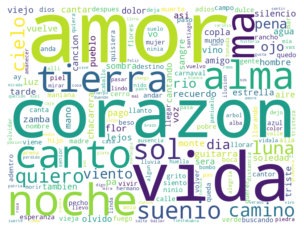

In [6]:
# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 600,
                      background_color ='white',
                      min_font_size = 0.1).generate(dataset)

# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplots_adjust(right=2)
wordcloud.to_file('imagenes/folclore.png')

In [7]:
import multidict as multidict
import re
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [11]:
frec_dict = {y:x for x,y in word_dict.items()}
sorted_words = sorted(frec_dict.items())

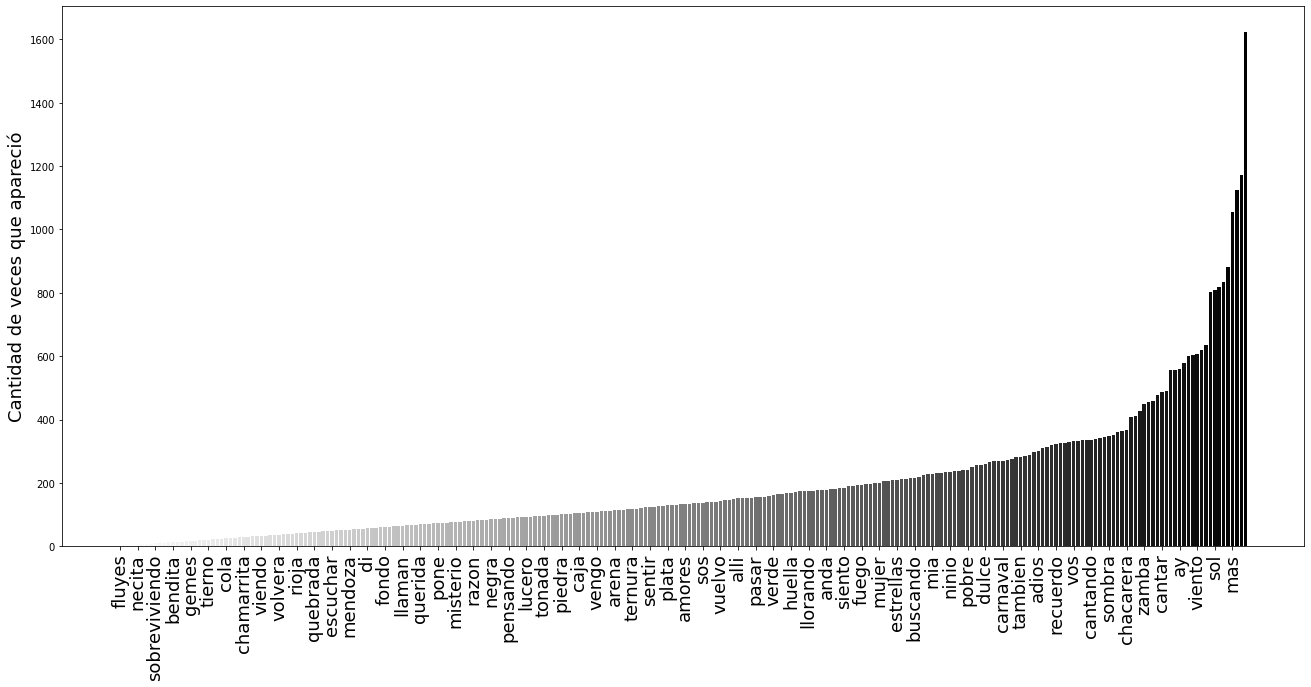

In [52]:
valores, palabras = [], []
for i, t in enumerate(sorted_words):
    color = (1-i/len(sorted_words), 1-i/len(sorted_words), 1-i/len(sorted_words))
    plt.bar(i, t[0], color = color)
    if i % 4 == 0:
        valores.append(i)
        palabras.append(t[1])
plt.ylabel('Cantidad de veces que apareció', fontsize=18)
plt.xticks(valores, palabras,rotation='vertical', fontsize=18)
plt.subplots_adjust(right=3, top=2)
plt.show()

# Similitud entre archivos (Comparación vectorial)